In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = '~/Desktop/workspace/indeed/Job-Satisfaction/data'
df_info = pd.read_csv(data_path+'/Fortune_1000/fortune50_info.csv').head(49)

df_info

,Rank,Company_Name,Employee_Number,Revenues(m),Revenues(pc),Profits,Profits(pc),Assets(m),Market_Value(m),Sector,Industry
0,1,Walmart,"2,200,000","$514,405.00",2.8%,"$6,670.00",-32.4%,"$219,295.00","$279,880.00",Retailing,General Merchandisers
1,2,Exxon Mobil,"71,000","$290,212.00",18.8%,"$20,840.00",5.7%,"$346,196.00","$342,172.00",Energy,Petroleum Refining
2,3,Apple,"132,000","$265,595.00",15.9%,"$59,531.00",23.1%,"$365,725.00","$895,667.00",Technology,"Computers, Office Equipment"
3,4,Berkshire Hathaway,"389,000","$247,837.00",2.4%,"$4,021.00",-91.1%,"$707,794.00","$493,870.00",Financials,Insurance: Property and Casualty (Stock)
4,5,Amazon.com,"647,500","$232,887.00",30.9%,"$10,073.00",232.1%,"$162,648.00","$874,710.00",Retailing,Internet Services and Retailing
5,6,UnitedHealth Group,"300,000","$226,247.00",12.5%,"$11,986.00",13.5%,"$152,221.00","$237,256.00",Health Care,Health Care: Insurance and Managed Care
6,7,McKesson,"68,000","$208,357.00",4.9%,$67.00,-98.7%,"$60,381.00","$22,455.00",Health Care,Wholesalers: Health Care
7,8,CVS Health,"295,000","$194,579.00",5.3%,-$594.00,-109.0%,"$196,456.00","$69,952.00",Health Care,Health Care: Pharmacy and Other Services
8,9,AT&T,"268,220","$170,756.00",6.4%,"$19,370.00",-34.2%,"$531,864.00","$228,445.00",Telecommunications,Telecommunications
9,10,AmerisourceBergen,"20,500","$167,940.00",9.7%,"$1,658.40",355.0%,"$37,670.00","$16,786.00",Health Care,Wholesalers: Health Care


In [3]:
df_sector = df_info.groupby('Sector')['Sector'].count().reset_index(name="Count")
df_sector = df_sector[df_sector.Count > 2]
sectors = df_sector.Sector.tolist()
sectors

['Energy',
 'Financials',
 'Health Care',
 'Retailing',
 'Technology',
 'Telecommunications']

In [4]:
def merge_data(company_list=range(1,50), reviewed_year=[2018, 2019]):
    df = pd.DataFrame()
    rating_columns = ['Rating_Number', 'Work_Life', 'Benefits','Job_Advancement', 'Management', 'Culture']
    info_columns = df_info.columns.tolist()
    
    df_company_list = pd.read_csv( '~/Desktop/workspace/indeed/Job-Satisfaction/data/scraper_data/indeed_site50.csv')
    
    for company_index in company_list:
        company_name = df_company_list.iloc[company_index - 1]['Company_Name']
        data_path = f'~/Desktop/workspace/indeed/Job-Satisfaction/data/companies/{company_index}_{company_name}/{company_name}.csv'
        
        df_reviews = pd.read_csv(data_path)
        df_reviews = df_reviews[df_reviews.Reviewed_Year.isin(reviewed_year)]
        df_ratings = df_reviews[rating_columns]
        
        company_info = df_info.iloc[company_index-1].to_list()
        num_rows = df_ratings.shape[0]
        
        df_company_info = pd.DataFrame([company_info]*num_rows, columns = info_columns)
        
        df_company_merge = pd.concat([df_company_info, df_ratings], axis=1)
        df = pd.concat([df, df_company_merge]).reset_index(drop=True)
        
    return df

df = merge_data()
df.tail()


,Rank,Company_Name,Employee_Number,Revenues(m),Revenues(pc),Profits,Profits(pc),Assets(m),Market_Value(m),Sector,Industry,Rating_Number,Work_Life,Benefits,Job_Advancement,Management,Culture
217814,49.0,Archer Daniels Midland,"31,600","$64,341.00",5.8%,"$1,810.00",13.5%,"$40,833.00","$24,157.00","Food, Beverages & Tobacco",Food Production,4.0,2.0,3.0,3.0,3.0,3.0
217815,49.0,Archer Daniels Midland,"31,600","$64,341.00",5.8%,"$1,810.00",13.5%,"$40,833.00","$24,157.00","Food, Beverages & Tobacco",Food Production,4.0,2.0,3.0,4.0,4.0,3.0
217816,49.0,Archer Daniels Midland,"31,600","$64,341.00",5.8%,"$1,810.00",13.5%,"$40,833.00","$24,157.00","Food, Beverages & Tobacco",Food Production,5.0,5.0,5.0,5.0,5.0,5.0
217817,49.0,Archer Daniels Midland,"31,600","$64,341.00",5.8%,"$1,810.00",13.5%,"$40,833.00","$24,157.00","Food, Beverages & Tobacco",Food Production,4.0,4.0,4.0,4.0,3.0,5.0
217818,49.0,Archer Daniels Midland,"31,600","$64,341.00",5.8%,"$1,810.00",13.5%,"$40,833.00","$24,157.00","Food, Beverages & Tobacco",Food Production,5.0,5.0,5.0,5.0,5.0,5.0


In [5]:
df.rename(columns={"Revenues(m)":"Revenues", "Assets(m)":"Assets",
                  "Market_Value(m)":"Market_Value"}, inplace=True)
df.dtypes

Rank               float64
Company_Name        object
Employee_Number     object
Revenues            object
Revenues(pc)        object
Profits             object
Profits(pc)         object
Assets              object
Market_Value        object
Sector              object
Industry            object
Rating_Number      float64
Work_Life          float64
Benefits           float64
Job_Advancement    float64
Management         float64
Culture            float64
dtype: object

In [6]:
df['Employee_Number'] = df['Employee_Number'].str.replace('\$|,', "")
df['Revenues'] = df['Revenues'].str.replace('\$|,', "").str[:-3]
df['Profits'] = df['Profits'].str.replace('\$|,', "").str[:-3]
df['Assets'] = df['Assets'].str.replace('\$|,', "").str[:-3]
df['Market_Value'] = df['Market_Value'].str.replace('\$|,', "").str[:-3]


df.head()


,Rank,Company_Name,Employee_Number,Revenues,Revenues(pc),Profits,Profits(pc),Assets,Market_Value,Sector,Industry,Rating_Number,Work_Life,Benefits,Job_Advancement,Management,Culture
0,1.0,Walmart,2200000,514405,2.8%,6670,-32.4%,219295,279880,Retailing,General Merchandisers,3.0,4.0,3.0,4.0,3.0,4.0
1,1.0,Walmart,2200000,514405,2.8%,6670,-32.4%,219295,279880,Retailing,General Merchandisers,3.0,3.0,0.0,3.0,3.0,3.0
2,1.0,Walmart,2200000,514405,2.8%,6670,-32.4%,219295,279880,Retailing,General Merchandisers,4.0,4.0,4.0,4.0,3.0,4.0
3,1.0,Walmart,2200000,514405,2.8%,6670,-32.4%,219295,279880,Retailing,General Merchandisers,5.0,0.0,0.0,0.0,0.0,0.0
4,1.0,Walmart,2200000,514405,2.8%,6670,-32.4%,219295,279880,Retailing,General Merchandisers,1.0,1.0,1.0,2.0,1.0,1.0


In [6]:
df['Employee_Number'] = df['Employee_Number'].replace('', np.nan)
df['Revenues'] = df['Revenues'].replace('', np.nan)
df['Profits'] = df['Profits'].replace('', np.nan)
df['Assets'] = df['Assets'].replace('', np.nan)
df['Market_Value'] = df['Market_Value'].replace('', np.nan)

In [7]:
df.shape

(217819, 17)

In [8]:
df_info.Sector.unique()

array(['Retailing', 'Energy', 'Technology', 'Financials', 'Health Care',
       'Telecommunications', 'Motor Vehicles & Parts',
       'Food & Drug Stores', 'Industrials', 'Aerospace & Defense',
       'Chemicals', 'Transportation', 'Household Products',
       'Food, Beverages & Tobacco'], dtype=object)

In [9]:
df_sector_gt2 = df[df.Sector.isin(sectors)]
print(df_sector_gt2.shape)
display(df_sector_gt2.Sector.unique())
display(df_sector_gt2.head())

(184237, 17)


array(['Retailing', 'Energy', 'Technology', 'Financials', 'Health Care',
       'Telecommunications'], dtype=object)

,Rank,Company_Name,Employee_Number,Revenues,Revenues(pc),Profits,Profits(pc),Assets,Market_Value,Sector,Industry,Rating_Number,Work_Life,Benefits,Job_Advancement,Management,Culture
0,1.0,Walmart,2200000,514405,2.8%,6670,-32.4%,219295,279880,Retailing,General Merchandisers,3.0,4.0,3.0,4.0,3.0,4.0
1,1.0,Walmart,2200000,514405,2.8%,6670,-32.4%,219295,279880,Retailing,General Merchandisers,3.0,3.0,0.0,3.0,3.0,3.0
2,1.0,Walmart,2200000,514405,2.8%,6670,-32.4%,219295,279880,Retailing,General Merchandisers,4.0,4.0,4.0,4.0,3.0,4.0
3,1.0,Walmart,2200000,514405,2.8%,6670,-32.4%,219295,279880,Retailing,General Merchandisers,5.0,0.0,0.0,0.0,0.0,0.0
4,1.0,Walmart,2200000,514405,2.8%,6670,-32.4%,219295,279880,Retailing,General Merchandisers,1.0,1.0,1.0,2.0,1.0,1.0


In [12]:
df_sector_gt2.to_csv('~/Desktop/workspace/indeed/Job-Satisfaction/data/LinearRegression/lr_sectorwise_gt2.csv')

In [39]:
df.to_csv('~/Desktop/workspace/indeed/Job-Satisfaction/data/LinearRegression/lr_sectorwise.csv')

In [40]:
for sector in sectors: 
    df_sector = df[df.Sector == sector]
    df_sector.to_csv(f'~/Desktop/workspace/indeed/Job-Satisfaction/data/LinearRegression/sector/{sector}.csv')

In [10]:
df1 = df.copy()

In [11]:
df['Employee_Number'] = df['Employee_Number'].astype(np.float)
df['Revenues'] = df['Revenues'].astype(np.float)/df['Employee_Number']
df['Profits'] = df['Profits'].astype(np.float)/df['Employee_Number']
df['Assets'] = df['Assets'].astype(np.float)/df['Employee_Number']
df['Market_Value'] = df['Market_Value'].astype(np.float)/df['Employee_Number']

df.head()

,Rank,Company_Name,Employee_Number,Revenues,Revenues(pc),Profits,Profits(pc),Assets,Market_Value,Sector,Industry,Rating_Number,Work_Life,Benefits,Job_Advancement,Management,Culture
0,1.0,Walmart,2200000.0,0.23382,2.8%,0.003032,-32.4%,0.09968,0.127218,Retailing,General Merchandisers,3.0,4.0,3.0,4.0,3.0,4.0
1,1.0,Walmart,2200000.0,0.23382,2.8%,0.003032,-32.4%,0.09968,0.127218,Retailing,General Merchandisers,3.0,3.0,0.0,3.0,3.0,3.0
2,1.0,Walmart,2200000.0,0.23382,2.8%,0.003032,-32.4%,0.09968,0.127218,Retailing,General Merchandisers,4.0,4.0,4.0,4.0,3.0,4.0
3,1.0,Walmart,2200000.0,0.23382,2.8%,0.003032,-32.4%,0.09968,0.127218,Retailing,General Merchandisers,5.0,0.0,0.0,0.0,0.0,0.0
4,1.0,Walmart,2200000.0,0.23382,2.8%,0.003032,-32.4%,0.09968,0.127218,Retailing,General Merchandisers,1.0,1.0,1.0,2.0,1.0,1.0


In [12]:
df.shape

(217819, 17)

In [13]:
# df.shape
df.to_csv('~/Desktop/workspace/indeed/Job-Satisfaction/data/LinearRegression/lr_sectorwise_normalized.csv')

In [18]:
df.dropna(inplace=True)
df.shape

(49, 17)

In [139]:
df = df[['Employee_Number', 'Revenues', 'Profits', 'Assets', \
         'Market_Value', 'Rating_Number', 'Work_Life', 'Benefits', \
        'Job_Advancement', 'Management', 'Culture']]

print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(49, 11)
(49, 11)


In [8]:
import statsmodels.formula.api as sm

result = sm.ols(formula="Rating_Number ~ Work_Life + Benefits +\
Job_Advancement + Management + Culture ", 
data=df).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          Rating_Number   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 4.483e+04
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:20:11   Log-Likelihood:            -2.7965e+05
No. Observations:              217817   AIC:                         5.593e+05
Df Residuals:                  217811   BIC:                         5.594e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.5837      0.005    3

In [142]:
import statsmodels.formula.api as sm

result = sm.ols(formula="Rating_Number ~ Employee_Number + Profits+\
Assets+Market_Value+Revenues", 
data=df).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          Rating_Number   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     6.846
Date:                Mon, 19 Aug 2019   Prob (F-statistic):           8.91e-05
Time:                        14:42:57   Log-Likelihood:                 11.772
No. Observations:                  49   AIC:                            -11.54
Df Residuals:                      43   BIC:                           -0.1925
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.6428      0.050     

<function matplotlib.pyplot.show(*args, **kw)>

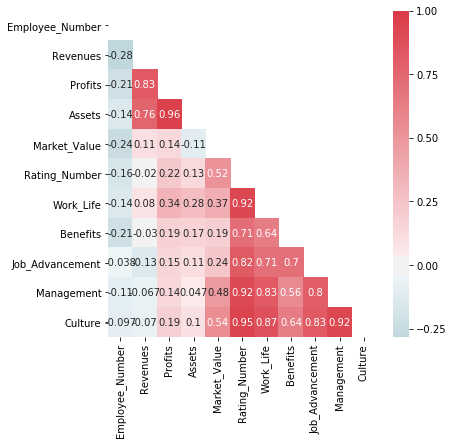

In [143]:
import seaborn as sns

# sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(6, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, center=0.0)
plt.show